## Comparison to a buplished model

In [1]:
import numpy as np
import os,re
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import warnings
import seaborn as sns
import matplotlib.patches as mpatches

from statannot import add_stat_annotation

#ignore some depr warnings
warnings.filterwarnings("ignore")


In [2]:
#load data
dsc_scores = pd.read_excel(r'./data/comp_to_publ_meth_dsc.xlsx')
jacc_scores = pd.read_excel(r'./data/comp_to_publ_meth_jacc.xlsx')
h95th_scores = pd.read_excel(r'./data/comp_to_publ_meth_h95th.xlsx')

In [3]:
#formatting data for visualization
sorted_keys, sorted_vals = (('Whole image','Patches around tumor','Whole image.'),(dsc_scores['Comparable model: whole image'],dsc_scores['Comparable model: with path'],dsc_scores['Proposed model']))
sorted_keys_j, sorted_vals_j = (('Whole image','Patches around tumor','Whole image.'),(jacc_scores['Comparable model: whole image'],jacc_scores['Comparable model: with path'],jacc_scores['Proposed model']))
sorted_keys_h, sorted_vals_h = (('Whole image','Patches around tumor','Whole image.'),(h95th_scores['Comparable model: whole image'],h95th_scores['Comparable model: with path'],h95th_scores['Proposed model']))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Comparable model: with path v.s. Proposed model: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.706e-01 U_stat=1.600e+02
Comparable model: whole image v.s. Proposed model: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.835e-07 U_stat=2.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Comparable model: with path v.s. Proposed model: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.706e-01 U_stat=1.600e+02
Comparable model: whole image v.s. Proposed model: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.835e-07 U_stat=2.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e

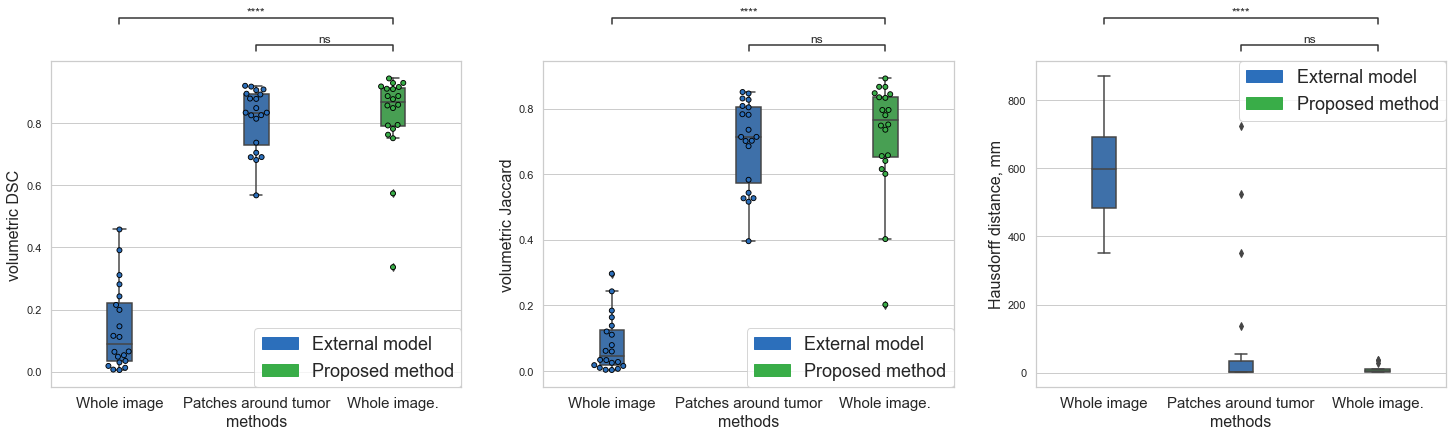

In [4]:
plt.figure(figsize=(25,6))
sns.set(context='notebook', style='whitegrid')

my_pal = {i: sns.xkcd_rgb["medium green"] if re.search('image.',key.lower()) else sns.xkcd_rgb["medium blue"] for i,key in enumerate(sorted_keys)}

plt.subplot(131)

sns.utils.axlabel(xlabel='methods', ylabel='volumetric DSC', fontsize=16)
ax = sns.boxplot(data=sorted_vals, width=.18,palette=my_pal)
sns.swarmplot(data=sorted_vals, size=5, edgecolor="black", linewidth=.9,palette=my_pal)

an = add_stat_annotation(ax, data = dsc_scores, order=['Comparable model: whole image','Comparable model: with path','Proposed model'], 
                         box_pairs=[('Proposed model','Comparable model: whole image'),('Proposed model','Comparable model: with path')],#box_pairs=[(0,1)],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ext_meth = mpatches.Patch(color=sns.xkcd_rgb["medium blue"] , label='External model')
prop_meth = mpatches.Patch(color=sns.xkcd_rgb["medium green"], label='Proposed method')
ax.legend(handles=[ext_meth,prop_meth],borderaxespad=0.,loc=4, fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(plt.xticks()[0], sorted_keys,fontsize=15)

plt.subplot(132)

sns.utils.axlabel(xlabel='methods', ylabel='volumetric Jaccard', fontsize=16)
ax = sns.boxplot(data=sorted_vals_j, width=.18,palette=my_pal)
sns.swarmplot(data=sorted_vals_j, size=5, edgecolor="black", linewidth=.9,palette=my_pal)

an = add_stat_annotation(ax, data = jacc_scores, order=['Comparable model: whole image','Comparable model: with path','Proposed model'], 
                         box_pairs=[('Proposed model','Comparable model: whole image'),('Proposed model','Comparable model: with path')],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ext_meth = mpatches.Patch(color=sns.xkcd_rgb["medium blue"] , label='External model')
prop_meth = mpatches.Patch(color=sns.xkcd_rgb["medium green"], label='Proposed method')
ax.legend(handles=[ext_meth,prop_meth],borderaxespad=0.,loc=4, fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(plt.xticks()[0], sorted_keys_j,fontsize=15)

plt.subplot(133)

sns.utils.axlabel(xlabel='methods', ylabel='Hausdorff distance, mm', fontsize=16)
ax = sns.boxplot(data=sorted_vals_h, width=.18,palette=my_pal)

an = add_stat_annotation(ax, data = h95th_scores, order=['Comparable model: whole image','Comparable model: with path','Proposed model'], 
                         box_pairs=[('Proposed model','Comparable model: whole image'),('Proposed model','Comparable model: with path')],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ext_meth = mpatches.Patch(color=sns.xkcd_rgb["medium blue"] , label='External model')
prop_meth = mpatches.Patch(color=sns.xkcd_rgb["medium green"], label='Proposed method')
ax.legend(handles=[ext_meth,prop_meth],borderaxespad=0.,loc=1, fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(plt.xticks()[0], sorted_keys_h,fontsize=15)

plt.show()

In [5]:
print('Averaged volumetric DSC for proposed model using whole image: %s, IQR: %s'%(np.median(dsc_scores['Proposed model']),scipy.stats.iqr(dsc_scores['Proposed model'])))


Averaged volumetric DSC for proposed model using whole image: 0.8673466631793778, IQR: 0.12216304025337787


In [6]:
print('Averaged volumetric DSC for a published model using whole image: %s, IQR: %s'%(np.median(dsc_scores['Comparable model: whole image']),scipy.stats.iqr(dsc_scores['Comparable model: whole image'])))

Averaged volumetric DSC for a published model using whole image: 0.08877685230795407, IQR: 0.18813922176927667


In [7]:
print('Averaged volumetric DSC for a published model using pre cropped regions: %s, IQR: %s'%(np.median(dsc_scores['Comparable model: with path']),scipy.stats.iqr(dsc_scores['Comparable model: with path'])))

Averaged volumetric DSC for a published model using pre cropped regions: 0.8330082920246855, IQR: 0.16354180677029406
